### A/B Testing: Frequentist and Bayesian Approaches

**OBJECTIVES**

- Implement A/B testing with frequentist hypothesis tests
- Implement A/B testing using a Bayesian perspective
- Implement Bandit Solutions to A/B testing

### The Frequentist Approach


![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Marey_-_birds.jpg/440px-Marey_-_birds.jpg)


To start, we have an example derived from Meridith and Krushcke's [BEST](https://cran.r-project.org/web/packages/BEST/vignettes/BEST.pdf) documentation.  These two arrays represent reaction times for the groups, where group 1 receives a treatment and group 2 is the placebo group.

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pymc3 as pm
import arviz as az

In [2]:
treatment = np.array([5.77, 5.33, 4.59, 4.33, 3.66, 4.48])
control = np.array([3.88, 3.55, 3.29, 2.59, 2.33, 3.59])

**HYPOTHESIS TEST REVIEW**

- State the Null and Alternative Hypothesis
- State a significance level 
- Run the test

In [ ]:
#null and alternative hypothesis?


In [ ]:
#significance level?


In [ ]:
#test


### Multiple Groups


![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Rinnhofer-foto-muschel.jpg/440px-Rinnhofer-foto-muschel.jpg)


The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

- The samples are independent.

- Each sample is from a normally distributed population.

- The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

-------

The example below has data on mussel shell lengths from five locations around the world.  

In [3]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735,
             0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,
           0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [4]:
#use f_oneway
stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

In [5]:
#Reject the null hypothesis that all means are equal!

In [6]:
#compare a single dataset to a distribution --> is the data normal with mean 3.

### Bayesian Approach

In [7]:
treatment = [5.77, 5.33, 4.59, 4.33, 3.66, 4.48]
control = [3.88, 3.55, 3.29, 2.59, 2.33, 3.59]

In [8]:
import pymc3 as pm

In [34]:
#define the model Normal and Half Normal Priors
with pm.Model() as model:
    #priors for means
    μ_t = pm.Normal('μ_t', mu = 0, sd = 3)
    μ_c = pm.Normal('μ_c', mu = 0, sd = 3)
    
    #prior on sd
    σ_t = pm.HalfNormal('σ_t', sd = 1)
    σ_c = pm.HalfNormal('σ_c', sd = 1)
    
    #likelihood!
    treatment_likelihood = pm.Normal('treatment', mu = μ_t, sd = σ_t, observed = treatment)
    control_likelihood = pm.Normal('control', mu=μ_c, sd = σ_c, observed=control)

In [35]:
#define the difference
with model:
    difference = pm.Deterministic('μ_1 - μ_2', μ_t - μ_c)

In [36]:
#sample
with model:
    trace = pm.sample(1000)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ_c, σ_t, μ_c, μ_t]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'μ_t'}>,
        <AxesSubplot:title={'center':'μ_t'}>],
       [<AxesSubplot:title={'center':'μ_c'}>,
        <AxesSubplot:title={'center':'μ_c'}>]], dtype=object)

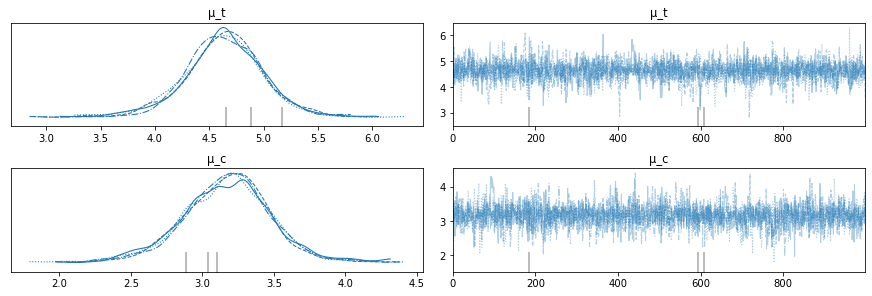

In [37]:
#plot the means
az.plot_trace(trace, var_names=['μ_t', 'μ_c'])

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'μ_t'}>,
       <AxesSubplot:title={'center':'μ_c'}>], dtype=object)

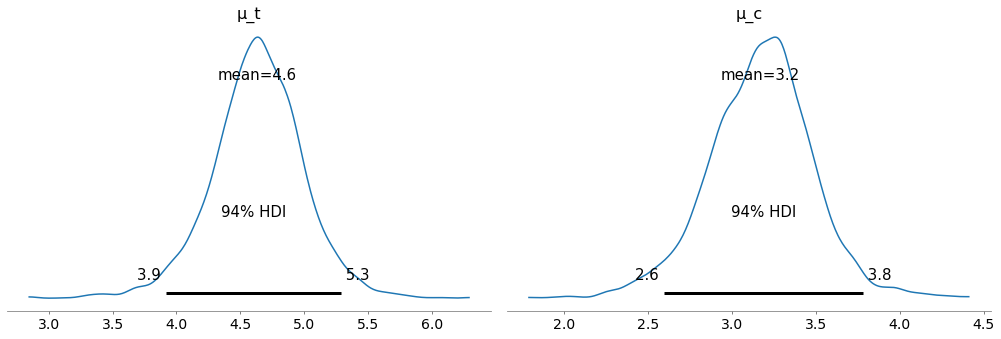

In [38]:
#posterior plot
az.plot_posterior(trace, ['μ_t', 'μ_c'])

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

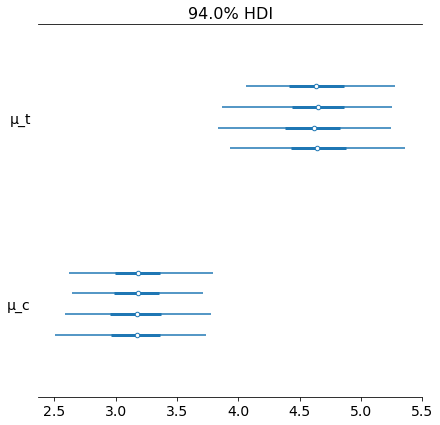

In [39]:
#forest plot
az.plot_forest(trace, var_names=['μ_t', 'μ_c'])

In [40]:
#summary
az.summary(trace, var_names=['μ_t', 'μ_c'])

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ_t,4.632,0.361,3.917,5.291,0.008,0.005,2252.0,2252.0,2396.0,1865.0,1.0
μ_c,3.169,0.311,2.594,3.781,0.007,0.005,2121.0,2096.0,2203.0,1853.0,1.0


/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'μ_1 - μ_2'}>

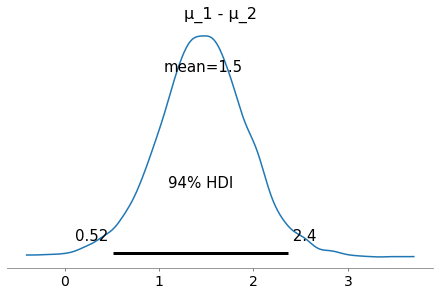

In [41]:
az.plot_posterior(trace, var_names=['μ_1 - μ_2'])

### Adjusting our Priors

Now, let's revisit this with the `StudentT` distribution.  Here, we need to pay attention to an additional parameter $\nu$, and that the parameterization of the T distribution in pymc3 uses sensitivity or 1/$\sigma^2$ as the `lam` parameter.

We can use an `Exponential` distribution to model the $\nu$ parameter for the distributions and simply define $\lambda$.

Specify the model:

- $\mu_1, \mu_2 \rightarrow$ `Normal`
- $\sigma_1, \sigma_2 \rightarrow$ `Uniform`
- $\nu \rightarrow$ `Exponential`

In [43]:
treatment = [5.77, 5.33, 4.59, 4.33, 3.66, 4.48]
control = [3.88, 3.55, 3.29, 2.59, 2.33, 3.59]

#define the model 
with pm.Model() as ttester:
    μ_1 = pm.Normal('μ_1', mu = 3, sd = 3)
    μ_2 = pm.Normal('μ_2', mu = 3, sd = 3)
    
    σ_1 = pm.Uniform('σ_1', lower = 0, upper = 10)
    σ_2 = pm.Uniform('σ_2', lower = 0, upper = 10)
    
    ν = pm.Exponential('ν', 1/30)

#defin likelihoods and lambdas
with ttester:
    λ_1 = σ_1 ** -2
    λ_2 = σ_2 ** -2
    
    treatment_like = pm.StudentT('treatment', nu = ν, mu = μ_1, lam = λ_1, observed = treatment)
    control_like = pm.StudentT('control', nu = ν, mu = μ_2, lam = λ_2, observed = control)


#determine the difference in means
with ttester:
    difference_in_means = pm.Deterministic('μ_1 - μ_2', μ_1 - μ_2)

#sample
with ttester:
    trace = pm.sample(1000)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν, σ_2, σ_1, μ_2, μ_1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'μ_1'}>,
        <AxesSubplot:title={'center':'μ_1'}>],
       [<AxesSubplot:title={'center':'μ_2'}>,
        <AxesSubplot:title={'center':'μ_2'}>]], dtype=object)

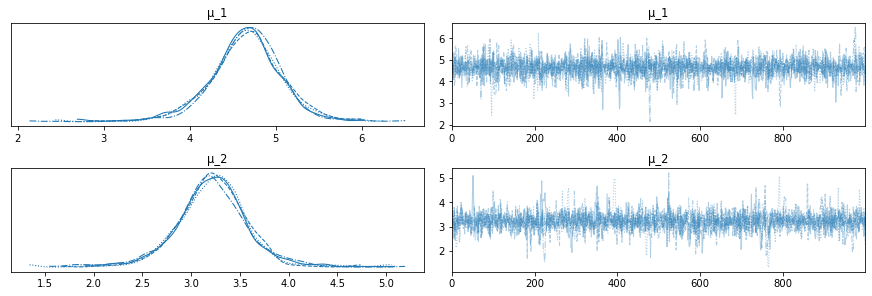

In [44]:
#plot the means
az.plot_trace(trace, var_names=['μ_1', 'μ_2'])

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'μ_1 - μ_2'}>

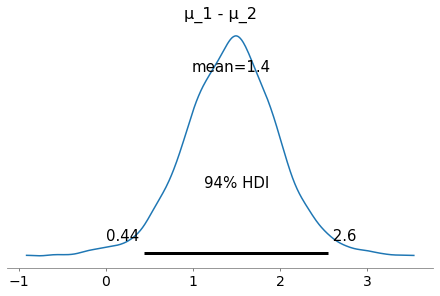

In [45]:
#plot the difference
az.plot_posterior(trace, var_names=['μ_1 - μ_2'])

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'σ_1'}>,
        <AxesSubplot:title={'center':'σ_1'}>],
       [<AxesSubplot:title={'center':'σ_2'}>,
        <AxesSubplot:title={'center':'σ_2'}>]], dtype=object)

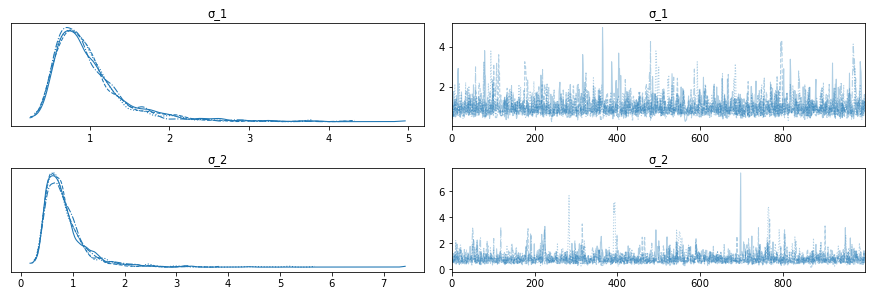

In [46]:
az.plot_trace(trace, var_names=['σ_1', 'σ_2'])

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

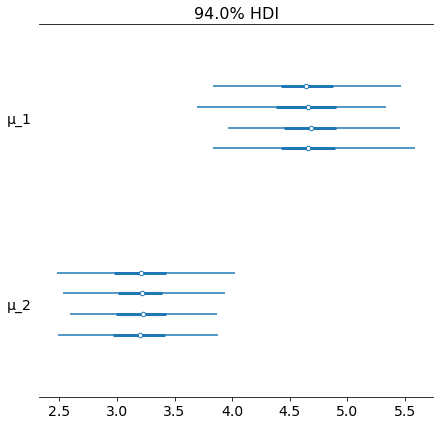

In [33]:
#forest plot of means
az.plot_forest(trace, var_names=['μ_1', 'μ_2'])

### Problem

The information below represents the number of clicks two variations of an advertisement received.  Use `Beta` priors and `Bernoulli` likelihoods to describe the difference in performance to these ads:

```
n = 500 #number of views for each
ad1 = 310 #ad1 click
ad2 = 320 #ad2 clicks
```

In [49]:
with pm.Model() as adtest:
    #priors for ad1 and ad2
    pad1 = pm.Uniform('ad_1', lower = 0, upper = 1)
    pad2 = pm.Uniform('ad_2', lower = 0, upper = 1)
    
    #likelihoods for ad1 and ad2 -- n is n, probabilities are priors
    like_ad1 = pm.Binomial('ad1_like', p = pad1, n = 500, observed = 310)
    like_ad2 = pm.Binomial('ad2_like', p = pad2, n = 500, observed = 320)
    
    #difference in priors
    difference = pm.Deterministic('difference', pad1 - pad2)
    
    #sample
    trace = pm.sample(1000)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ad_2, ad_1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


In [47]:
with pm.Model() as adtest:
    #priors for ad1 and ad2
    pad1 = pm.Beta('ad_1', alpha = 1, beta = 1)
    pad2 = pm.Beta('ad_2', alpha = 1, beta = 1)
    
    #likelihoods for ad1 and ad2 -- n is n, probabilities are priors
    like_ad1 = pm.Binomial('ad1_like', p = pad1, n = 500, observed = 310)
    like_ad2 = pm.Binomial('ad2_like', p = pad2, n = 500, observed = 320)
    
    #difference in priors
    difference = pm.Deterministic('difference', pad1 - pad2)
    
    #sample
    trace = pm.sample(1000)
    
    

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ad_2, ad_1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'difference'}>

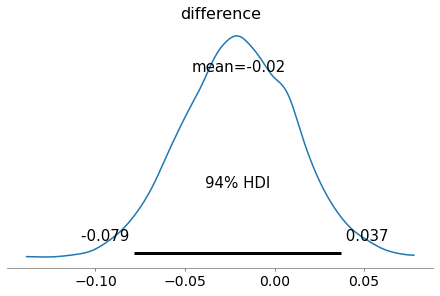

In [50]:
#Are they different?  Why?
az.plot_posterior(trace, var_names=['difference'])

In [59]:
with pm.Model() as adtest:
    #priors for ad1 and ad2
    pad1 = pm.Beta('ad_1', alpha = 1, beta = 1)
    pad2 = pm.Beta('ad_2', alpha = 1, beta = 1)
    
    #likelihoods for ad1 and ad2 -- n is n, probabilities are priors
    like_ad1 = pm.Bernoulli('ad1_like', p = pad1, n = 500, observed = 310)
    like_ad2 = pm.Bernoulli('ad2_like', p = pad2, n = 500, observed = 320)
    
    #difference in priors
    difference = pm.Deterministic('difference', pad1 - pad2)
    
    #sample
    trace = pm.sample(1000)

SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'ad_1_logodds__': array(0.), 'ad_2_logodds__': array(0.)}

Initial evaluation results:
ad_1_logodds__   -1.39
ad_2_logodds__   -1.39
ad1_like          -inf
ad2_like          -inf
Name: Log-probability of test_point, dtype: float64

In [ ]:
az.plot_trace(trace, var_names=['ad_1', 'ad_2'])

### Many Groups

In [51]:
#load the penguins
penguins = sns.load_dataset('penguins').dropna()

In [52]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [53]:
#create numeric category tag
penguins['enc'] = penguins['species'].factorize()[0]

In [54]:
#define the model
with pm.Model() as penguin_model:
    mu = pm.Normal('μ', mu = 190, sd = 10, shape = 3)
    sigma = pm.HalfCauchy('σ', beta = 5, shape = 3)
    
    like = pm.Normal('like_penguins', mu = mu[penguins['enc']],
                    sd = sigma[penguins['enc']], 
                     observed = penguins['flipper_length_mm'].values)
    
    trace = pm.sample(1000)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'μ'}>,
        <AxesSubplot:title={'center':'μ'}>]], dtype=object)

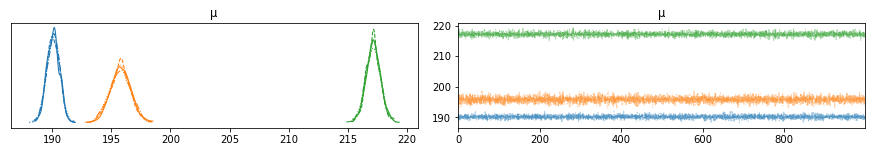

In [55]:
#sample
az.plot_trace(trace, var_names=['μ'])

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

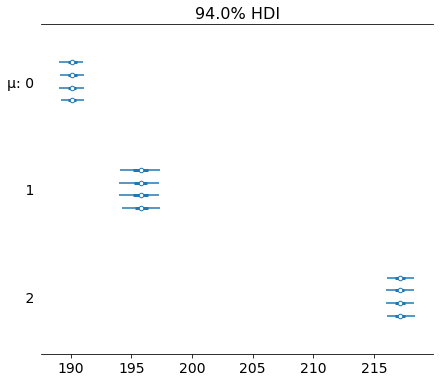

In [56]:
#look at the mean and standard deviation
az.plot_forest(trace, var_names=['μ'])

In [ ]:
#how'd we do?


In [ ]:
#forest plot of means


### Bandit Problems

In probability theory, the multi-armed bandit problem is a problem in which a fixed limited set of resources must be allocated between competing (alternative) choices in a way that maximizes their expected gain, when each choice's properties are only partially known at the time of allocation, and may become better understood as time passes or by allocating resources to the choice. -- [Source](https://en.wikipedia.org/wiki/Multi-armed_bandit)

In [5]:
import numpy as np

In [6]:
rand = np.random.rand

class Bandits(object):
    """
    This class represents N bandits machines.

    parameters:
        p_array: a (n,) Numpy array of probabilities >0, <1.

    methods:
        pull( i ): return the results, 0 or 1, of pulling 
                   the ith bandit.
    """
    def __init__(self, p_array):
        self.p = p_array
        self.optimal = np.argmax(p_array)
        
    def pull(self, i):
        #i is which arm to pull
        return np.random.rand() < self.p[i]
    
    def __len__(self):
        return len(self.p)

In [7]:
class BayesianStrategy(object):
    """
    Implements a online, learning strategy to solve
    the Multi-Armed Bandit problem.
    
    parameters:
        bandits: a Bandit class with .pull method
    
    methods:
        sample_bandits(n): sample and train on n pulls.

    attributes:
        N: the cumulative number of samples
        choices: the historical choices as a (N,) array
        bb_score: the historical score as a (N,) array
    """
    
    def __init__(self, bandits):
        
        self.bandits = bandits
        n_bandits = len(self.bandits)
        self.wins = np.zeros(n_bandits)
        self.trials = np.zeros(n_bandits)
        self.N = 0
        self.choices = []
        self.bb_score = []

    
    def sample_bandits(self, n=1):
        
        bb_score = np.zeros(n)
        choices = np.zeros(n)
        
        for k in range(n):
            #sample from the bandits's priors, and select the largest sample
            choice = np.argmax(np.random.beta(1 + self.wins, 1 + self.trials - self.wins))
            
            #sample the chosen bandit
            result = self.bandits.pull(choice)
            
            #update priors and score
            self.wins[choice] += result
            self.trials[choice] += 1
            bb_score[k] = result 
            self.N += 1
            choices[k] = choice
            
        self.bb_score = np.r_[self.bb_score, bb_score]
        self.choices = np.r_[self.choices, choices]
        return 

In [10]:
import scipy.stats as stats

In [11]:
#figsize(11.0, 10)

beta = stats.beta
x = np.linspace(0.001,.999,200)

def plot_priors(bayesian_strategy, prob, lw = 3, alpha = 0.2, plt_vlines = True):
    ## plotting function
    wins = bayesian_strategy.wins
    trials = bayesian_strategy.trials
    for i in range(prob.shape[0]):
        y = beta(1+wins[i], 1 + trials[i] - wins[i])
        p = plt.plot(x, y.pdf(x), lw = lw)
        c = p[0].get_markeredgecolor()
        plt.fill_between(x,y.pdf(x),0, color = c, alpha = alpha, 
                         label="underlying probability: %.2f" % prob[i])
        if plt_vlines:
            plt.vlines(prob[i], 0, y.pdf(prob[i]) ,
                       colors = c, linestyles = "--", lw = 2)
        plt.autoscale(tight = "True")
        plt.title("Posteriors After %d pull" % bayesian_strategy.N +\
                    "s"*(bayesian_strategy.N > 1))
        plt.autoscale(tight=True)
    return

In [13]:
import matplotlib.pyplot as plt

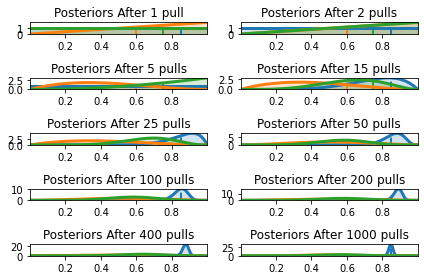

In [14]:
hidden_prob = np.array([0.85, 0.60, 0.75])
bandits = Bandits(hidden_prob)
bayesian_strat = BayesianStrategy(bandits)

draw_samples = [1, 1, 3, 10, 10, 25, 50, 100, 200, 600]

for j,i in enumerate(draw_samples):
    plt.subplot(5, 2, j+1) 
    bayesian_strat.sample_bandits(i)
    plot_priors(bayesian_strat, hidden_prob)
    #plt.legend()
    plt.autoscale(tight = True)
plt.tight_layout()

### More Examples

- Solve regression problem with PyMC3
- Solve classification problem with PyMC3
- Solve A/B testing problem with PyMC3

In [ ]:
treatment = np.array([101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101])
control = np.array([99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99])